# Yandex Data Science School
## Linear Regression & Regularization Exercise.


## Outline
In this exercise you will learn the following topics:

1. Refresher on how linear regression is solved in batch and in Gradient Descent 
2. Implementation of Ridge Regression
3. Comparing Ridge, Lasso and vanila Linear Regression on a dataset

# Git Exercise
In this exercise you will also experience working with github.

You might need to install local python enviroment.
Installation Instruction for ex2 - working on a local python environment:
https://docs.google.com/document/d/1G0rBo36ff_9JzKy0EkCalK4m_ThNUuJ2bRz463EHK9I

## please add the github link of your work below:


example: https://github.com/username/exercise_name

## Refresher on Ordinary Least Square (OLS) aka Linear Regeression

### Lecture Note

In Matrix notation, the matrix $X$ is of dimensions $n \times p$ where each row is an example and each column is a feature dimension. 

Similarily, $y$ is of dimension $n \times 1$ and $w$ is of dimensions $p \times 1$.

The model is $\hat{y}=X\cdot w$ where we assume for simplicity that $X$'s first columns equals to 1 (one padding), to account for the bias term.

Our objective is to optimize the loss $L$ defines as resiudal sum of squares (RSS): 

$L_{RSS}=\frac{1}{N}\left\Vert Xw-y \right\Vert^2$ (notice that in matrix notation this means summing over all examples, so $L$ is scalar.)

To find the optimal $w$ one needs to derive the loss with respect to $w$.

$\frac{\partial{L_{RSS}}}{\partial{w}}=\frac{2}{N}X^T(Xw-y)$ (to see why, read about [matrix derivatives](http://www.gatsby.ucl.ac.uk/teaching/courses/sntn/sntn-2017/resources/Matrix_derivatives_cribsheet.pdf) or see class notes )

Thus, the gardient descent solution is $w'=w-\alpha \frac{2}{N}X^T(Xw-y)$.

Solving $\frac{\partial{L_{RSS}}}{\partial{w}}=0$ for $w$ one can also get analytical solution:

$w_{OLS}=(X^TX)^{-1}X^Ty$

The first term, $(X^TX)^{-1}X^T$ is also called the pseudo inverse of $X$.

See [lecture note from Stanford](https://web.stanford.edu/~mrosenfe/soc_meth_proj3/matrix_OLS_NYU_notes.pdf) for more details.


## Exercise 1 - Ordinary Least Square
* Get the boston housing dataset by using the scikit-learn package. hint: [load_boston](http://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_boston.html)

* What is $p$? what is $n$ in the above notation? hint: [shape](https://docs.scipy.org/doc/numpy-1.15.0/reference/generated/numpy.ndarray.shape.html)

* write a model `OrdinaryLinearRegression` which has a propoery $w$ and 3 methods: `fit`, `predict` and `score` (which returns the MSE on a given sample set). Hint: use [numpy.linalg.pinv](https://docs.scipy.org/doc/numpy-1.15.1/reference/generated/numpy.linalg.pinv.html) to be more efficient.

* Fit the model. What is the training MSE?

* Plot a scatter plot where on x-axis plot $Y$ and in the y-axis $\hat{Y}_{OLS}$

* Split the data to 75% train and 25% test 20 times. What is the average MSE now for train and test? Hint: use [train_test_split](http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html) or [ShuffleSplit](http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.ShuffleSplit.html).

* Use a t-test to proove that the MSE for training is significantly smaller than for testing. What is the p-value? Hint: use [scipy.stats.ttest_rel](https://docs.scipy.org/doc/scipy-0.14.0/reference/generated/scipy.stats.ttest_rel.html). 

* Write a new class `OrdinaryLinearRegressionGradientDescent` which inherits from `OrdinaryLinearRegression` and solves the problem using gradinet descent. The class should get as a parameter the learning rate and number of iteration. Plot the class convergance. What is the effect of learning rate? How would you find number of iteration automatically? Note: Gradient Descent does not work well when features are not scaled evenly (why?!). Be sure to normalize your features first.

* The following parameters are optional (not mandatory to use):
    * early_stop - True / False boolean to indicate to stop running when loss stops decaying and False to continue.
    * verbose- True/False boolean to turn on / off logging, e.g. print details like iteration number and loss (https://en.wikipedia.org/wiki/Verbose_mode)
    * track_loss - True / False boolean when to save loss results to present later in learning curve graphs

In [11]:
import pandas as pd
import numpy as np
from sklearn import datasets
from sklearn.model_selection import train_test_split
from scipy import stats
import matplotlib.pyplot as plt
# n - number of samples, p - number of features (weights)
from sklearn import metrics

In [12]:
# * write a model `Ols` which has a propoery $w$ and 3 methods: `fit`, `predict` and `score`.? 
# hint: use [numpy.linalg.pinv](https://docs.scipy.org/doc/numpy-1.15.1/reference/generated/numpy.linalg.pinv.html) 
# to be more efficient.

class Ols(object):
  def __init__(self):
    self.w = None
    
  @staticmethod
  def pad(X):
    return np.hstack((np.ones((X.shape[0],1)), X))
  
  def fit(self, X, Y):    
    self.w = (np.linalg.pinv(self.pad(X)).dot(Y))
    
  def predict(self, X):
    return self.pad(X).dot(self.w)
    
  def score(self, X, Y): # returns the MSE on a given sample set  
    return ((Y - self.predict(X))**2).sum() / Y.shape[0]

In [13]:
boston = datasets.load_boston()
X = np.array(boston.data)
y = np.array(boston.target)

The training MSE is 21.894831181729202
The average MSE for train set is 21.3092
The average MSE for test set is 24.7699
MSE for training set is significantly smaller than for testing. The p-value is 0.006391130360727829


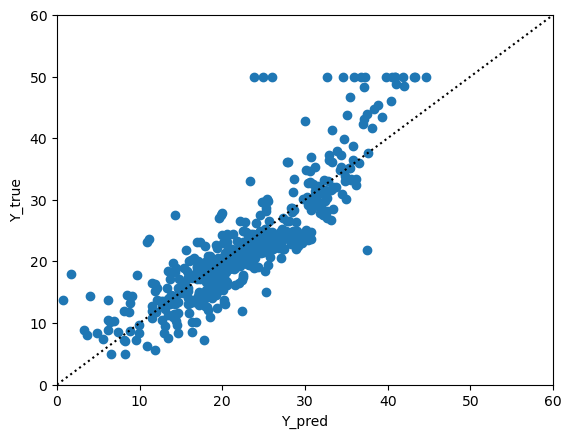

In [14]:
model = Ols()
model.fit(X,y)
print ('The training MSE is', model.score(X,y))

plt.figure()
plt.scatter(model.predict(X),y)
plt.xlim(0,60)
plt.ylim(0,60)
plt.plot((0,60),(0,60), ls=':', c='k')
plt.xlabel('Y_pred')
plt.ylabel('Y_true')

n_splits = 20
MSE_train = np.zeros(n_splits)
MSE_test = np.zeros(n_splits)

for i in range(0,n_splits):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)
    model = Ols() 
    model.fit(X_train, y_train)
    MSE_train[i] = model.score(X_train, y_train)
    MSE_test[i] = model.score(X_test, y_test)

pvalue = stats.ttest_rel(MSE_train, MSE_test).pvalue
pvalue_threshold = 0.05
print ('The average MSE for train set is', MSE_train.mean().round(4))
print ('The average MSE for test set is', MSE_test.mean().round(4))
if pvalue > pvalue_threshold:
    print ('MSE for training set is NOT significantly smaller than for testing. The p-value is', pvalue)
else:
    print ('MSE for training set is significantly smaller than for testing. The p-value is', pvalue)

In [15]:
# Write a new class OlsGd which solves the problem using gradinet descent. 
# The class should get as a parameter the learning rate and number of iteration. 
# Plot the loss convergance. for each alpha, learning rate plot the MSE with respect to number of iterations.
# What is the effect of learning rate? 
# How would you find number of iteration automatically? 
# Note: Gradient Descent does not work well when features are not scaled evenly (why?!). Be sure to normalize your 
# feature first.
class Normalizer():
    """The function performs Z - normalization"""
    def __init__(self):
        pass

    def fit(self, X):
        self.means = X.mean(axis=0)
        self.std = np.sqrt(((X - self.means)**2).sum(axis=0) / X.shape[0])


    def predict(self, X):
    #apply normalization
        return (X - self.means) / self.std
    
class OlsGd(Ols):
  
    def __init__(self, learning_rate=.05, 
               num_iteration=1000, 
               normalize=True,
               early_stop=True,
               early_stop_delta=0.001,
               verbose=True):
    
        super(OlsGd, self).__init__()
        self.learning_rate = learning_rate
        self.num_iteration = num_iteration
        self.early_stop = early_stop
        self.normalize = normalize
        self.normalizer = Normalizer()    
        self.verbose = verbose
        self.early_stop_delta = early_stop_delta
    
    def _fit(self, X, Y, reset=True, track_loss=True):
    #remeber to normalize the data before starting
        if self.normalize:
            self.normalizer.fit(X)
            X = self.normalizer.predict(X)
    
        if track_loss: # Initialization of loss tracker
            self.loss_tracker = [] 
    
        self.w = np.ones(self.pad(X).shape[1]) # Initial weights
        self.y_pred = self._predict(X)#!!!!!!!!!!!!!!!!!!!
    
        if self.early_stop: # Initialization of early stopping
            prev_loss = np.inf
            delta = np.inf
            i = 0
        
            while delta > self.early_stop_delta:
                self._step(X, Y)
                i += 1
                delta = prev_loss - self.loss
                prev_loss = self.loss
                try:
                    self.loss_tracker.append(self.loss)
                except: continue
                if self.verbose == 2:
                    print(f'Epoch: {i}, Loss: {self.loss}')
          
            else: 
                if self.verbose == 1:
                    print(f'Early stop was triggered at {i}-th epoch with loss: {self.loss}')
            
        else:
            for i in range(self.num_iteration):
                self._step(X, Y)
                try:
                    self.loss_tracker.append(self.loss)
                except: continue
                if self.verbose == 2:
                    print(f'Epoch: {i}, Loss: {self.loss}')

    def _predict(self, X):
        #remeber to normalize the data before starting
        if self.normalize:
            X = self.normalizer.predict(X)
        return self.predict(X)

      
    def _step(self, X, Y):
        # use w update for gradient descent
        self.loss = (self.y_pred - Y).T.dot(self.y_pred - Y) / 2 # Loss function from the lecture slides 
        d_loss = (self.pad(X).T.dot(self.y_pred - Y)) # Loss derivative
        self.w = self.w - self.learning_rate * (1/X.shape[0]) * d_loss # Update weights
        self.y_pred = self.predict(X)


Early stop was triggered at 7417-th epoch with loss: 5540.960938986332
Early stop was triggered at 4252-th epoch with loss: 5540.177517325666
Early stop was triggered at 1104-th epoch with loss: 5539.548254505007
Early stop was triggered at 606-th epoch with loss: 5539.470201484582
Early stop was triggered at 231-th epoch with loss: 5539.417100782943
Early stop was triggered at 3-th epoch with loss: 937762.3849106706


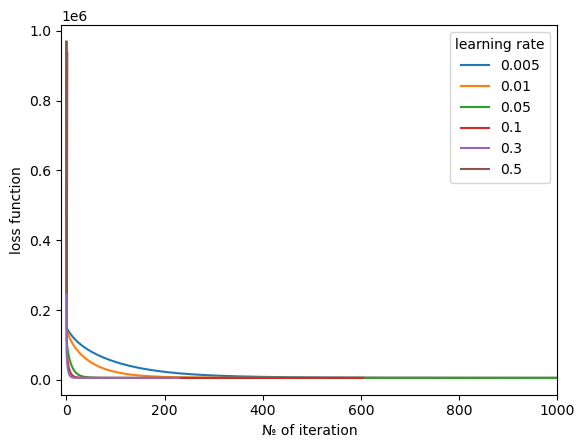

In [16]:
list_lern_rates = [0.005, 0.01, 0.05, 0.1, 0.3, 0.5]
for i in list_lern_rates:
    model = OlsGd(learning_rate=i, 
                   num_iteration=1000, 
                   normalize=True,
                   early_stop=True,
                   verbose=1,
                   early_stop_delta=0.001)
    model._fit(X, y)#!!!!!!!!!!_fit
    plt.plot(model.loss_tracker)
    plt.xlim(left = -10, right = 1000)
    plt.legend(list_lern_rates, title = 'learning rate')
    plt.xlabel('№ of iteration')
    plt.ylabel('loss function')

Learning rate affects the number of iterations needed to convevrge the loss. Wisely picked learning rate converges the loss faster. High values of learning rate break the gradient descent havent reached minimum (with early stoppinn enabled) or prevent of convergence of loss with fixed number of iterations.

The way to automatically find the number of iterations is to implement the early stopping of gradient descent by tracking difference between previous and current value of the loss function and stop the process when there is no much difference between iterations.

## Exercise 2 - Ridge Linear Regression

Recall that ridge regression is identical to OLS but with a L2 penalty over the weights:

$L(y,\hat{y})=\sum_{i=1}^{i=N}{(y^{(i)}-\hat{y}^{(i)})^2} + \lambda \left\Vert w \right\Vert_2^2$

where $y^{(i)}$ is the **true** value and $\hat{y}^{(i)}$ is the **predicted** value of the $i_{th}$ example, and $N$ is the number of examples

* Show, by differentiating the above loss, that the analytical solution is $w_{Ridge}=(X^TX+\lambda I)^{-1}X^Ty$
* Change `OrdinaryLinearRegression` and `OrdinaryLinearRegressionGradientDescent` classes to work also for ridge regression (do not use the random noise analogy but use the analytical derivation). Either add a parameter, or use inheritance.
* **Bonus: Noise as a regularizer**: Show that OLS (ordinary least square), if one adds multiplicative noise to the features the **average** solution for $W$ is equivalent to Ridge regression. In other words, if $X'= X*G$ where $G$ is an uncorrelated noise with variance $\sigma$ and mean 1, then solving for $X'$ with OLS is like solving Ridge for $X$. What is the interpretation? 



$\frac{\partial{L}}{\partial{w}} = X^T(Xw-Y) + \lambda w = 0$

$(X^TX+\lambda I)w = X^TY$

$w = (X^TX+\lambda I)^{-1}X^TY$

In [17]:
class RidgeLs(Ols):
  def __init__(self, ridge_lambda, *wargs, **kwargs):
    super(RidgeLs,self).__init__(*wargs, **kwargs)
    self.ridge_lambda = ridge_lambda
    
    
  def _fit(self, X, Y):
    self.w = (np.linalg.inv(self.pad(X).T.dot(self.pad(X)) 
                            + self.ridge_lambda * np.identity(self.pad(X).shape[1])).dot(self.pad(X).T).dot(Y))
    

MSE: 22.103200118347413


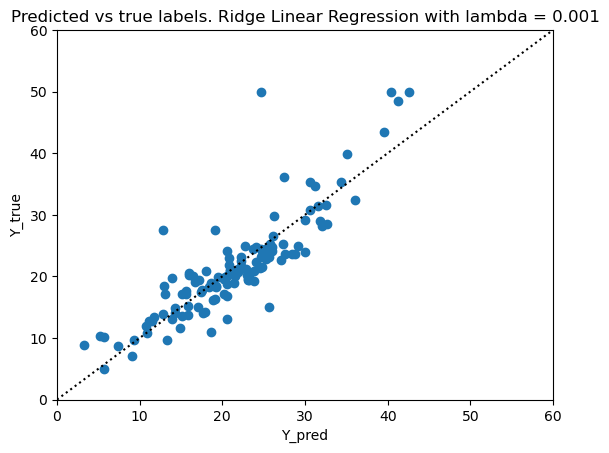

In [18]:
ridge_lambda = 0.001

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)
ridge_ols = RidgeLs(ridge_lambda)
ridge_ols._fit(X_train, y_train)
y_pred = ridge_ols.predict(X_test)

print(f'MSE: {ridge_ols.score(X_test, y_test)}')
plt.figure()
plt.scatter(y_pred, y_test)
plt.title(f'Predicted vs true labels. Ridge Linear Regression with lambda = {ridge_lambda}')
plt.xlim(0,60)
plt.ylim(0,60)
plt.xlabel('Y_pred')
plt.ylabel('Y_true')
plt.plot((0,60),(0,60), ls=':', c='k')
plt.show()

In [20]:
class RidgeLsGd(OlsGd):
    def _init_(self, ridge_lambda, *wargs, **kwargs):
        super(RidgeLsGd,self)._init_(*wargs, **kwargs)
        self.ridge_lambda = ridge_lambda


  
    def _step(self, X, Y):
        # use w update for gradient descent
        self.loss = (self.y_pred - Y).T.dot(self.y_pred - Y) / 2 + self.ridge_lambda * np.linalg.norm(self.w)# Loss function from the lecture slides 
        d_loss = (self.pad(X).T.dot(self.y_pred - Y)) + self.ridge_lambda * self.w # Loss derivative
        self.w = self.w - self.learning_rate * (1/X.shape[0]) * d_loss # Update weights
        self.y_pred = self.predict(X)

### Use scikitlearn implementation for OLS, Ridge and Lasso

In [21]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_squared_error

In [22]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [23]:
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)
y_pred_lr = lr_model.predict(X_test)

In [24]:
ridge_regr = Ridge(alpha=.001)
ridge_regr.fit(X_train, y_train)
y_pred_ridge = ridge_regr.predict(X_test)

In [25]:
lasso_regr = Lasso(alpha=.001)
lasso_regr.fit(X_train, y_train)
y_pred_lasso = lasso_regr.predict(X_test)

In [26]:
ols_regr = Ols()
ols_regr.fit(X_train, y_train)
y_pred_ols = ols_regr.predict(X_test)

In [27]:
olsgd_regr = OlsGd(verbose=False)
olsgd_regr._fit(X_train, y_train)
y_pred_olsgd = olsgd_regr._predict(X_test)

In [28]:
rigdels_regr = RidgeLs(.001)
rigdels_regr._fit(X_train, y_train)
y_pred_ridgels = rigdels_regr.predict(X_test)

In [29]:
print(f'Mean squared error Linear Regression: {mean_squared_error(y_pred_lr, y_test)}')
print(f'Mean squared error Ridge Regression: {mean_squared_error(y_pred_ridge, y_test)}')
print(f'Mean squared error Lasso Regression: {mean_squared_error(y_pred_lasso, y_test)}')
print(f'Mean squared error Ols Regression: {mean_squared_error(y_pred_ols, y_test)}')
print(f'Mean squared error OlsGd Regression: {mean_squared_error(y_pred_olsgd, y_test)}')
print(f'Mean squared error Ridgels Regression: {mean_squared_error(y_pred_ridgels, y_test)}')

Mean squared error Linear Regression: 22.098694827098036
Mean squared error Ridge Regression: 22.099117098011043
Mean squared error Lasso Regression: 22.106453932660635
Mean squared error Ols Regression: 22.098694827097876
Mean squared error OlsGd Regression: 22.1349032304767
Mean squared error Ridgels Regression: 22.103200118347413


All models perform equally on the same data, including implemented ones.